<h1>1. IMPORTING NESSASSARY LIBRARY

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import random
import operator
import matplotlib.pyplot as plt
import math
%matplotlib inline

<h1>2. MOUNTING GDRIVE

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


<h1>3. IMPORTING DATA

DATA : [Atlanta, Boston, Cincinnati, Denver, NewYork, Philadelphia, and San Francisco].csv

In [3]:
cities =  ['Atlanta', 'Boston', 'Cincinnati', 'Denver', 'New_York', 'Philadelphia', 'San_Francisco']
NUM_CITIES = len(cities)
df = [[] for _ in range(NUM_CITIES)]

for i in range(NUM_CITIES):
  df[i] = pd.read_csv('/content/drive/MyDrive/Travelling_Salesman_Project/Data/'+cities[i] + '.csv')
  print(df[i].shape)

(20, 3)
(40, 3)
(10, 3)
(83, 3)
(68, 3)
(30, 3)
(99, 3)


In [ ]:
# 한결's 파일 경로
for i in range(NUM_CITIES):
  df[i] = pd.read_csv('/content/drive/MyDrive/Algorithm/Project02/' + cities[i] + '.csv')
  print(df[i].shape)

In [5]:
df[0]

,Index,Latitude (deg),Longitude (deg)
0,0,33.665568,-84.411070
1,1,33.764940,-84.371819
2,2,33.770889,-84.358622
3,3,34.233391,-84.103278
4,4,33.921088,-84.337342
5,5,34.087634,-84.530646
6,6,33.683084,-84.442307
7,7,33.968483,-84.204487
8,8,33.809946,-84.438909
9,9,34.070898,-84.277636


<il>Index 
    
    
<il> Latitude (deg)  
    
    
<il>Longitude (deg)
    
    
    

<h1>4. VISUALIZE OF DELIVERY LOCATIONS

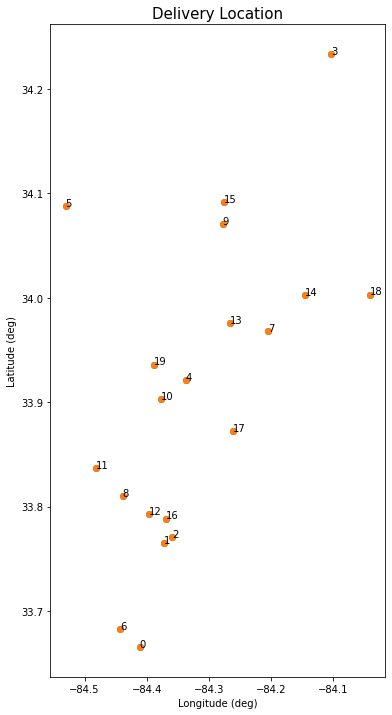

In [6]:
plt.figure(figsize= (6,12))
plt.scatter(df[0]['Longitude (deg)'],df[0]['Latitude (deg)'])
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.title("Delivery Location",fontsize=15)
plt.scatter(df[0]['Longitude (deg)'], df[0]['Latitude (deg)'])

for i,txt in enumerate(df[0]['Index']): plt.annotate(txt, (df[0]['Longitude (deg)'][i],df[0]['Latitude (deg)'][i]))
plt.show()

<h1>5. CALCULATING DISTANCE BETWEEN DELIVERY LOCATIONS

Estimation of Weight of Edges : Haversine Formula
 - Since the earth is neither a plane, distance must be clacuated based on this circulstances.
   - The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.
   -  Distance between two points are look like an arc in three dimension.



In [7]:
def GetDistByHaversine(lat1, lon1,lat2, lon2):
  radius = 6371*1000
  toRad = math.pi/180
  del_lon = abs(lon1-lon2) * toRad
  del_lat = abs(lat1-lat2) * toRad
  sin_del_lat = math.sin(del_lat / 2)
  sin_del_lon = math.sin(del_lon / 2)
  sq = sin_del_lat * sin_del_lat + math.cos(lat1* toRad) * math.cos(lat2* toRad) * sin_del_lon * sin_del_lon
  distance = 2 * radius * math.asin(math.sqrt(sq))
  return distance

<h1>6. CALCULATING DISTANCE BETWEEN DELIVERY LOCATIONS

In [9]:
def Calc_Delivery_Distance(city):
  dist = [[] for _ in range(len(city))]
  for i in range(len(city)):
    for j in range(len(city)):
      dist[i].append(GetDistByHaversine(city['Latitude (deg)'][i],city['Longitude (deg)'][i] , city['Latitude (deg)'][j], city['Longitude (deg)'][j]))      
  return np.asarray(dist)


Adjacency_Matrix = [[] for _ in range(NUM_CITIES)]
for i in range(NUM_CITIES): Adjacency_Matrix[i] = Calc_Delivery_Distance(df[i])
print(Adjacency_Matrix[2])

[[    0.          3277.69459128  2730.08910763  7486.63624729
   3885.7170309   4920.87578599  5054.95949915  4030.74278665
   3802.53783026  6527.87279239]
 [ 3277.69459128     0.          1965.20162069  5041.56532738
    609.96048874  1878.48584516  1987.45581165  1532.966353
    558.42545179  6734.49554764]
 [ 2730.08910763  1965.20162069     0.          7004.45421879
   2321.00297344  3784.59133297  2799.43154966  3466.97996991
   2445.05524214  4874.79813826]
 [ 7486.63624729  5041.56532738  7004.45421879     0.
   4746.37985973  3289.08700784  5306.43089065  3623.12619763
   4574.31969142 11614.32733565]
 [ 3885.7170309    609.96048874  2321.00297344  4746.37985973
      0.          1474.66460993  1480.74529429  1513.72667387
    272.9592074   6895.41887347]
 [ 4920.87578599  1878.48584516  3784.59133297  3289.08700784
   1474.66460993     0.          2210.72046908  1092.38495317
   1345.394331    8326.75717757]
 [ 5054.95949915  1987.45581165  2799.43154966  5306.43089065
   148

<h1>7. GREEDY SHORTEST CYCLE BY NEAREST NEIGHBOR SELECTION

In [10]:
def Greedy(start, graph, V):
  global Path
  while(1):
    if(sum(V)==len(graph)): return
    min_dist, min_idx = 1000000,0
    for i in range(len(graph[start])):
      if(start==i): continue
      if(not V[i]):
        if(min_dist>graph[start][i]):
          min_dist = graph[start][i]
          min_idx = i
    V[min_idx] = True
    start = min_idx
    Path.append(min_idx)

V = [False for _ in range(len(Adjacency_Matrix[0]))]
Path = []

start = 0
V[0] = True
Path.append(0)  # start point
Greedy(start, Adjacency_Matrix[0],V)
Path.append(0)  # back to origin start
print("The Shortest Cycle Route By The Greedy Algorithm.")
print(Path)

The Shortest Cycle Route By The Greedy Algorithm.
[0, 6, 1, 2, 16, 12, 8, 11, 10, 19, 4, 17, 13, 7, 14, 18, 9, 15, 3, 5, 0]


<h1>8.VISUALIZE GREEDY SHORTEST CYCLE BY NEAREST NEIGHBOR SELECTION


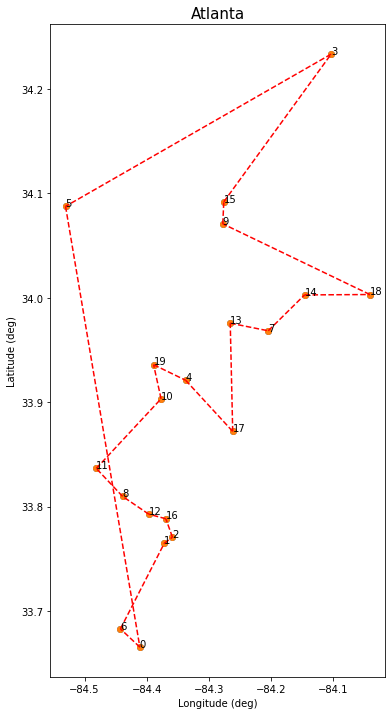

In [ ]:
From = []
To = []

for i in range(len(Path)-1):
  From.append(Path[i])
  To.append(Path[i+1])

plt.figure(figsize= (6,12))
plt.scatter(df[0]['Longitude (deg)'],df[0]['Latitude (deg)'])
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.title(cities[0],fontsize=15)
plt.scatter(df[0]['Longitude (deg)'], df[0]['Latitude (deg)'])

for i in range(len(From)):
  plt.plot([df[0]['Longitude (deg)'][From[i]],df[0]['Longitude (deg)'][To[i]]],[df[0]['Latitude (deg)'][From[i]],df[0]['Latitude (deg)'][To[i]]],'--', c='r')
for i,txt in enumerate(df[0]['Index']): plt.annotate(txt, (df[0]['Longitude (deg)'][i],df[0]['Latitude (deg)'][i]))
plt.show()

<h1>9.SHORTEST CYCLE BY GENETIC ALGORITHM

In [11]:
# Example city
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [12]:
# Create the population
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route
    
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [13]:
# Determine fitness
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [14]:
# Selection
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [15]:
# Crossover
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def crossoverPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [16]:
# Mutation
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [17]:
# Repeat the process from determining the fitness to mutation
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = crossoverPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [18]:
# Evolution in motion
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [ ]:
# Running the genetic algorithm
cityList = []

for i in range(len(Adjacency_Matrix[0])):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

In [ ]:
# 2. Evaluation of the fitness

#individual solution
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

#All solutions
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

### Genetic algorithm  
Reference:  
https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

Ø Let’s say that you execute the Genetic algorithm to get a solution to the given TSP problem.
Do you think that it is a global optimum or not? Tell us the rationale behind your thought.


Ø Let’s say that you execute the Genetic algorithm multiple times for the same problem. Do you think that you will always get the same solution (e.g., total travel distance is always identical)? If not, can you explain the reason why?  

#####한결's opinion: 동일한 솔루션을 얻을 수 있겠지만 과정이 달라질 수 있다고 생각한다. selection부터 crossover, mutation에 이르기까지 각각 random하게 element를 변경하거나 임의로 선택하는 과정이 있기 때문. 과정이 달라지고 시간도 다르겠지만 이 알고리즘의 목적은 최적의 경로를 찾는 것이기 때문에 동일한 답이 나온다고 생각한다.

####현수 :  if we run genetic algorithm several times for the same problem, it will provide answer depends on the problem's complexity. it is because as problem gets more complex, it will more likely to fall into local minimum. in that sense, unless we fall into global minimum. there always has a probability that it will fall into different local minimum.

Ø Let’s say that you would never be able to get a solution (i.e., it is always stuck in a local optimum) with the current set-up of the Genetic algorithm you implemented. How would
you be able to address this potential issue? 

[Hint: you may need to come up with what user-defined parameters should be changed from the current set-up]


####현수 : elliticism

Ø Let’s say that you would like to specify a stopping criterion in which the Genetic algorithm is terminated. How would you define the criterion?

#####한결's opinion: 충분한 repeatation을 하고 그래프화 하였을 때 어느정도면 solution에 가까워지는지 알 수 있으므로 그래프보고 판단하면 된다고 생각한다.

#### 현수 : i can imagine that there are several kinds of approaches for stopping training in deep learning. i think we can borrow those concepts.

Preprocessing
*   항목 추가
*   항목 추가

Nearest Neighbor Selection Algorithm
*   http://people.hsc.edu/faculty-staff/robbk/Math111/Lectures/Fall%202016/Lecture%2033%20-%20The%20Nearest-Neighbor%20Algorithm.pdf
*   항목 추가


Genetic Algorithm
*   항목 추가
*   항목 추가



